# 120 Years of Olympic history -- Athletes and results

This is another one of my many learning notebooks for Pandas and Numpy. The questions being answered here are all made up and are designed to just create scenarios that data analysis can solve.

### About the dataset

The dataset was sourced from https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results/home. 

The set contains 2 files:

In [1]:
!ls -lh data/

total 40M
-rw-rw-r-- 1 ernest ernest  40M Jun 15  2018 athlete_events.csv
-rw-rw-r-- 1 ernest ernest 3.6K Jun 15  2018 noc_regions.csv


In [2]:
!head -3 data/noc_regions.csv

ZIM,Zimbabwe,

In [3]:
!head -3 data/athlete_events.csv

According to the description, the following are the columns in the `athlete_events.csv` file:

In [4]:
col_desc = """
ID - Unique number for each athlete
Name - Athlete's name
Sex - M or F
Age - Integer
Height - In centimeters
Weight - In kilograms
Team - Team name
NOC - National Olympic Committee 3-letter code
Games - Year and season
Year - Integer
Season - Summer or Winter
City - Host city
Sport - Sport
Event - Event
Medal - Gold, Silver, Bronze, or NA"""

columns = [{'header': h[0].strip(), 'description': h[1].strip()} for h in [head.split(' - ') for head in col_desc.strip().split('\n')]]

In [5]:
columns

[{'header': 'ID', 'description': 'Unique number for each athlete'},
 {'header': 'Name', 'description': "Athlete's name"},
 {'header': 'Sex', 'description': 'M or F'},
 {'header': 'Age', 'description': 'Integer'},
 {'header': 'Height', 'description': 'In centimeters'},
 {'header': 'Weight', 'description': 'In kilograms'},
 {'header': 'Team', 'description': 'Team name'},
 {'header': 'NOC', 'description': 'National Olympic Committee 3-letter code'},
 {'header': 'Games', 'description': 'Year and season'},
 {'header': 'Year', 'description': 'Integer'},
 {'header': 'Season', 'description': 'Summer or Winter'},
 {'header': 'City', 'description': 'Host city'},
 {'header': 'Sport', 'description': 'Sport'},
 {'header': 'Event', 'description': 'Event'},
 {'header': 'Medal', 'description': 'Gold, Silver, Bronze, or NA'}]

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Reduce the number of rows displayed for data frames

In [7]:
pd.set_option('display.max_rows', 10)
#Another way to achieve the above is:
#pd.options.display.max_rows = 10

### Regions data

In [8]:
regions = pd.read_csv('data/noc_regions.csv')

In [9]:
regions

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


How many regions in total?

In [10]:
len(regions)

230

What is the `notes` column. This lists entries where `notes` is not `NaN`

In [11]:
regions[pd.notna(regions['notes'])]

,NOC,region,notes
1,AHO,Curacao,Netherlands Antilles
6,ANT,Antigua,Antigua and Barbuda
7,ANZ,Australia,Australasia
26,BOH,Czech Republic,Bohemia
51,CRT,Greece,Crete
...,...,...,...
213,UNK,NaN,Unknown
223,WIF,Trinidad,West Indies Federation
224,YAR,Yemen,North Yemen
226,YMD,Yemen,South Yemen


Seems there are 21 rows. Mostly alternative names...?

### The athletes_events file

In [12]:
athletes = pd.read_csv('data/athlete_events.csv')

Total number of entries in the file:

In [13]:
len(athletes)

271116

The data:

In [14]:
athletes.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [15]:
athletes.tail(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


We can index the `athletes` Df using the `ID` column, as it is supposed to contain unique IDs for data frame entries

In [16]:
athletes.set_index('ID', inplace=True)

In [17]:
athletes.head(3)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


Let's check whether the new index is unique:

In [18]:
athletes.index.is_unique

False

What values are duplicated in the index?

In [19]:
athletes.index.value_counts()

77710     58
106296    39
115354    38
119591    36
44875     32
          ..
42450      1
26215      1
46544      1
5737       1
2049       1
Name: ID, Length: 135571, dtype: int64

Well, it doesn't seem that the index is unique. Seems that the `ID` column's description was misunderstood: **Unique number for each athlete**

So we have to go back to the previous index configuration:

In [20]:
athletes.reset_index(inplace=True)

In [21]:
athletes

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


How many years does this cover?

In [22]:
print("Min year: ", athletes.Year.min(), ". Max year: ", athletes.Year.max())

Min year:  1896 . Max year:  2016


How does participation look like?

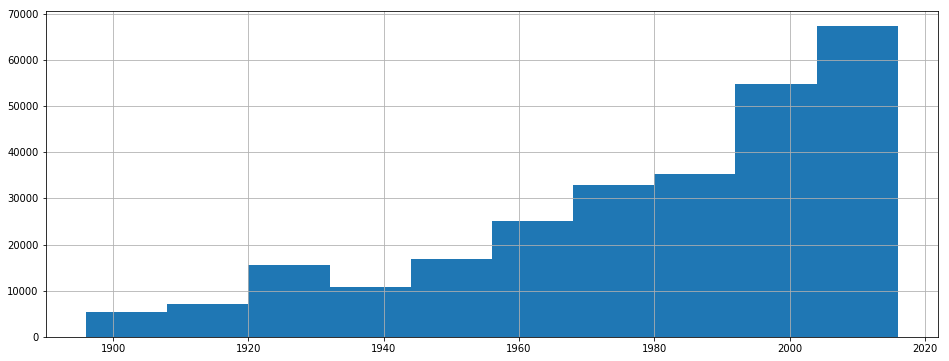

In [23]:
athletes.Year.hist(figsize=[16,6])

The above must be participation per athlete per discipline. How about the participation by athlete only?

In [24]:
year_groups = athletes.groupby('Year')
year_counts = year_groups['ID'].nunique().sort_index()

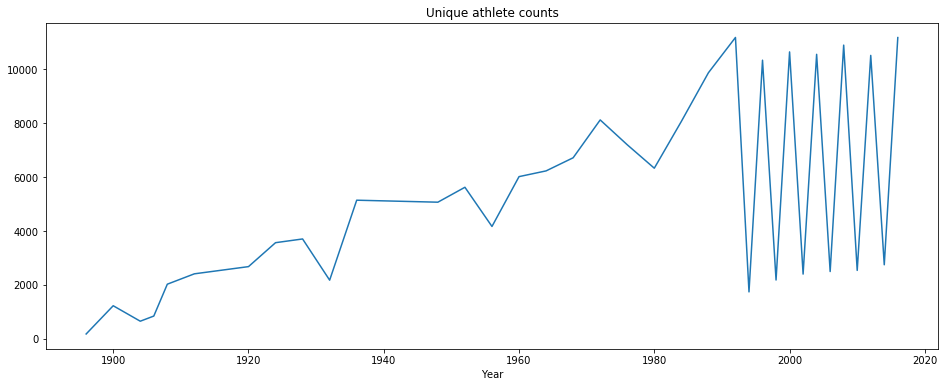

In [25]:
year_counts.plot(figsize=[16,6], title='Unique athlete counts')

What's the weird pattern towards the end?

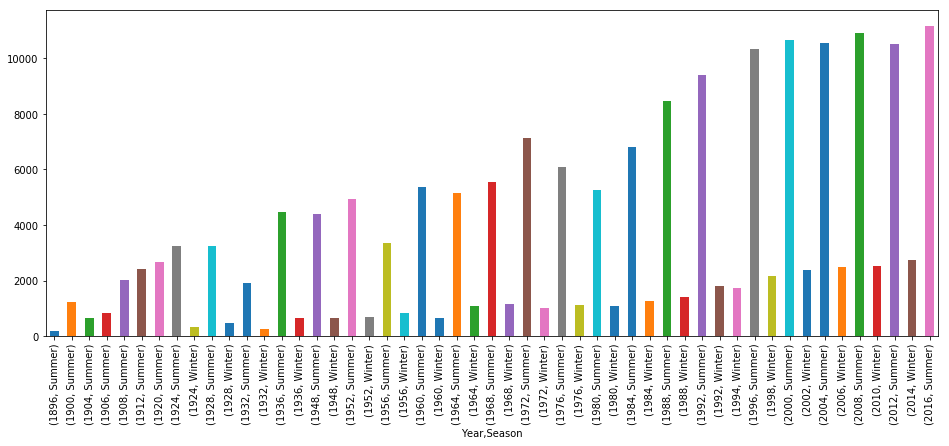

In [26]:
athletes.groupby(['Year', 'Season'])['ID'].nunique().sort_index().plot(figsize=[16,6], stacked=True, kind='bar')

I thought plot would be able to stack on a multi-index. Maybe we need to `unstack`:

In [27]:
year_season_groups = athletes.groupby(['Year', 'Season'])['ID'].nunique().sort_index()

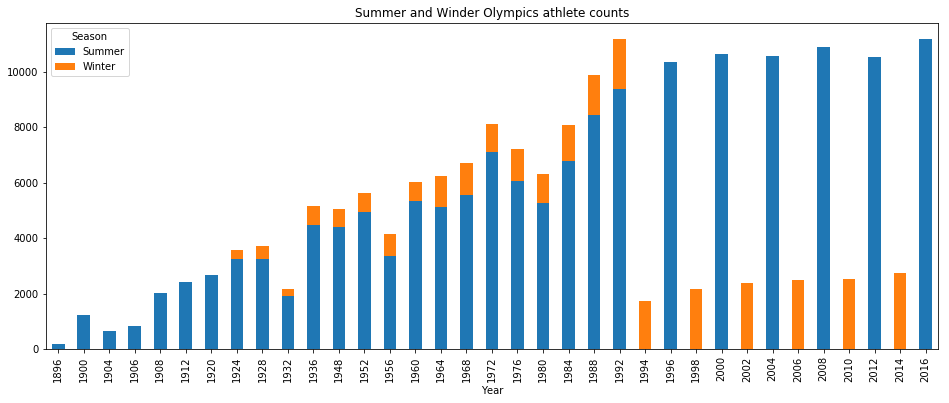

In [28]:
year_season_groups.unstack().plot(figsize=[16,6], stacked=True, kind='bar', title='Summer and Winder Olympics athlete counts')

So it seems the reason for the weird pattern at the end is that Summer Olympics take place 2 in separate years.

How many distinct athletes do we have in total?

In [29]:
len(athletes.ID.value_counts())

135571

### Athletes' gender

How do genders of athletes look like over the competitions?

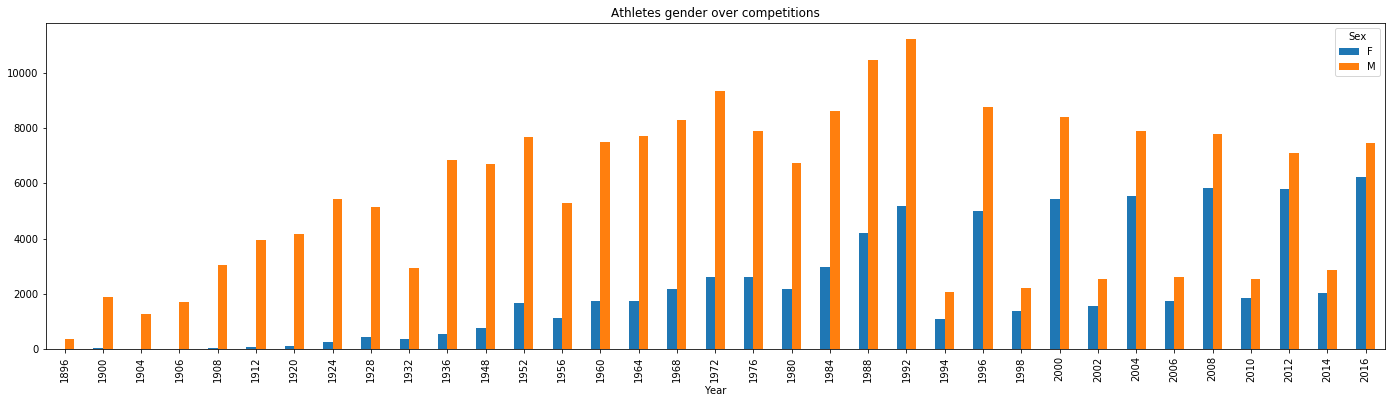

In [30]:
year_gender_groups = athletes.groupby(['Year', 'Sex'])

year_gender_groups['ID'].count().unstack().plot(kind='bar', title='Athletes gender over competitions', figsize=[24, 6])

In [31]:
genders = athletes.groupby(['Year', 'Sex'])['Sex'].count().unstack().fillna(0).apply(lambda l: l/l.sum(), axis=1) * 100
genders['Delta'] = genders['M'] - genders['F']

It seems that the M/F ratio has been decreasing over the years. The percentage of female participation is growing and is getting closer and closer to a 50/50 case.

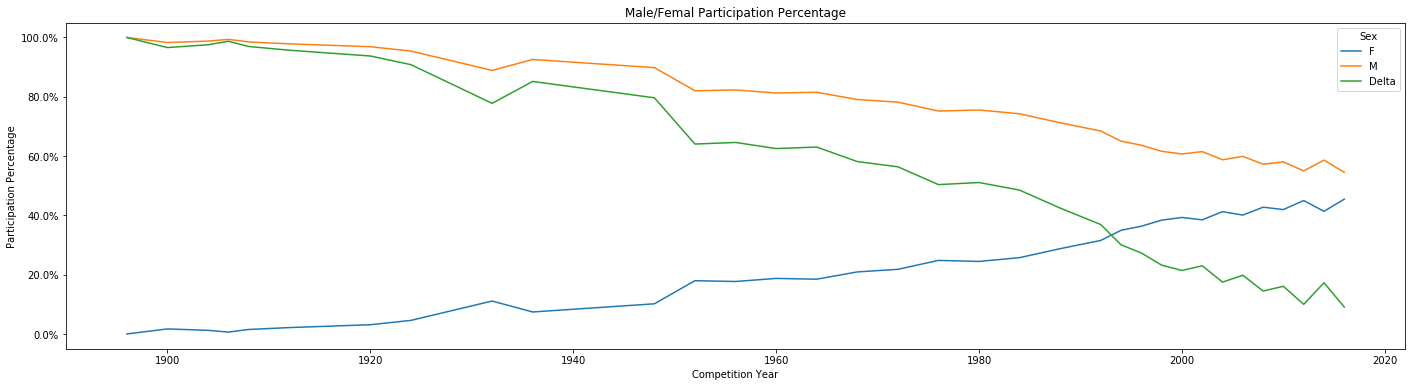

In [32]:
pl = genders.plot(figsize=[24, 6])
pl.set_yticklabels(['{tick}%'.format(tick=t) for t in pl.get_yticks()])
pl.set_ylabel('Participation Percentage')
pl.set_xlabel('Competition Year')
pl.set_title('Male/Femal Participation Percentage')
print('')

### Athletes' Age

Let's see the overall age distribution

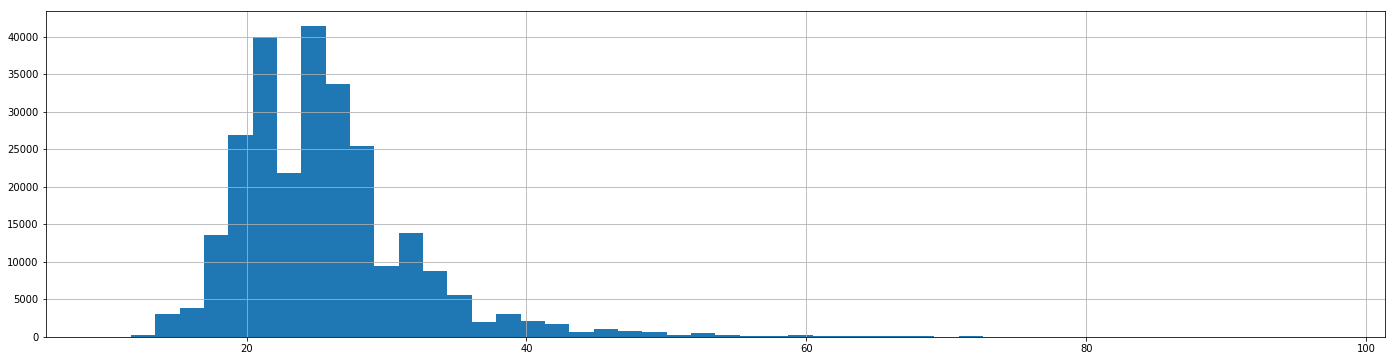

In [214]:
athletes.Age.hist(figsize=[24, 6], bins=50)

How about age groups?
Let's say:

* Under 20
* 20 -25
* 25 - 30
* 30 - 40
* Over 40

In [34]:
age_bins = pd.cut(athletes.Age, bins=[0, 20, 25, 30, 40, 100], labels=['Under 20', '20-25', '25-30', '30-40', 'Uver 40'])

In [35]:
age_group_counts = athletes.Age.groupby(age_bins).count()

**Athlete Age group distribution**

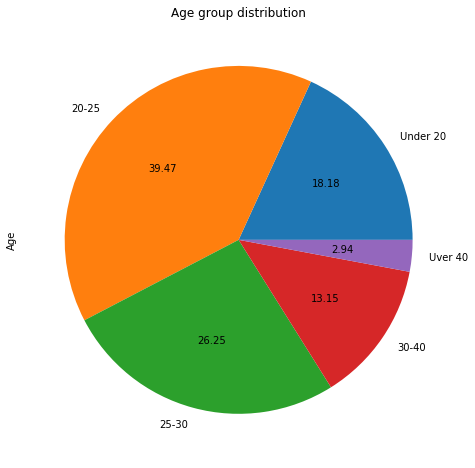

In [36]:
age_pie = age_group_counts.plot(kind='pie', figsize=[8, 8], autopct="%.2f")
age_pie.set_title('Age group distribution')
age_pie.set_yticklabels(['{tick}%'.format(tick=t) for t in age_pie.get_yticks()])

print()

### Average athlete age over competitions

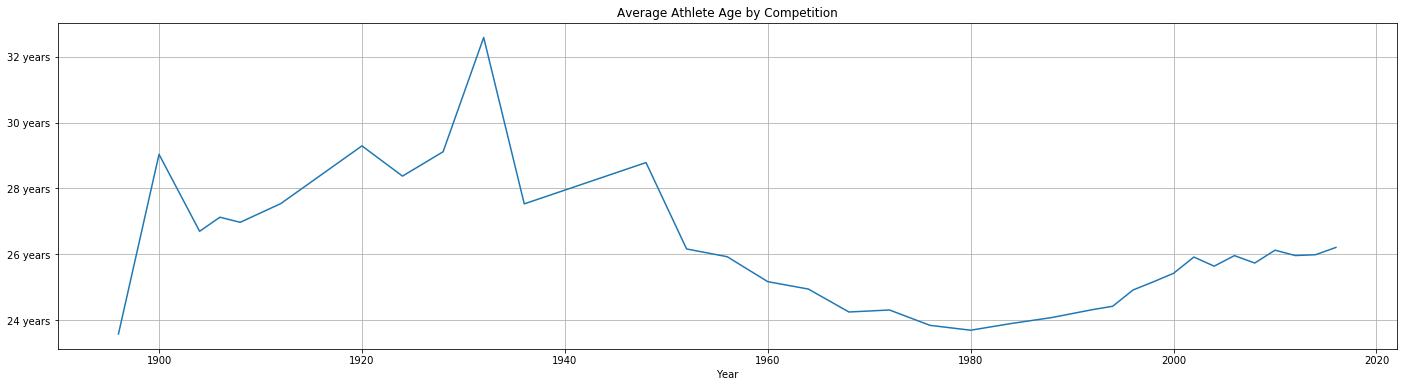

In [217]:
mean_age_plt = athletes.groupby('Year')['Age'].mean().plot(figsize=(24, 6), title='Average Athlete Age by Competition', grid=True)
mean_age_plt.set_yticklabels(['{tick} years'.format(tick=int(t)) for t in mean_age_plt.get_yticks()])

print()

#### How do max and min ages look?

In [38]:
year_groups = athletes.groupby('Year')['Age']

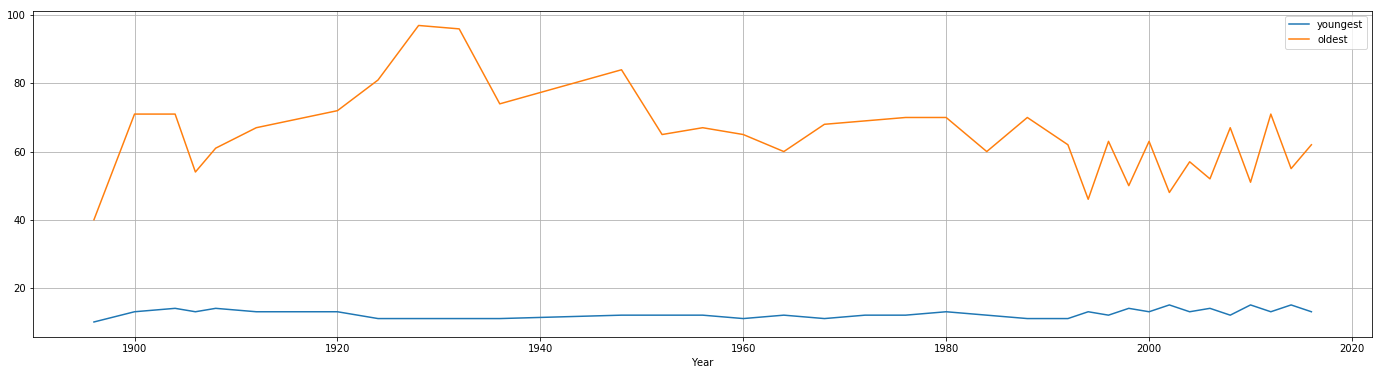

In [219]:
age_gaps = pd.DataFrame({'youngest': year_groups.min(), 'oldest': year_groups.max()})
age_gaps.plot(figsize=(24, 6), grid=True)
print()

#### Who were the oldest and youngest athletes for each competition?

This is a little tricky to compute. The problem is that we have a grouping on multiple columns and we have to lookup the original data frame on the max/min values, per group.
<br/>We'll do it in 3 steps:

*Step 1:* Reusing the `year_groups` grouping computed above, find the index/location of the group-level min and max values in the `Age` column:

In [40]:
max_age, min_age = year_groups.idxmax(), year_groups.idxmin()

*Step 2:* Use the index values computed in *step 1* to locate the corresponding rows in the `athletes` data frame.

Selecting the `Year`, `Age`, and `Name` columns as the `Year` will be used to merge min and max frames, while the rest will be needed in the result

In [41]:
max_age_athlete = athletes.loc[max_age, ['Year', 'Age', 'Name']]
min_age_athlete = athletes.loc[min_age, ['Year', 'Age', 'Name']]

*Step 3:* Use the `Year` column to merge the min and max data frames

In [42]:
min_max_age_result = pd.merge(min_age_athlete, max_age_athlete, on='Year')
min_max_age_result = min_max_age_result.assign(youngest_athlete=min_max_age_result['Name_x'], youngest_age=min_max_age_result['Age_x'],
                                              oldestest_athlete=min_max_age_result['Name_y'], oldest_age=min_max_age_result['Age_y'])

min_max_age_result = min_max_age_result.drop(['Age_x', 'Name_x', 'Age_y', 'Name_y'], axis=1)
min_max_age_result

,Year,youngest_athlete,youngest_age,oldestest_athlete,oldest_age
0,1896,Dimitrios Loundras,10.0,Charles Waldstein (-Walston),40.0
1,1900,"Catherine Marie Blanche ""Katie"" Gillou (-Fenwick)",13.0,Charles William Martin,71.0
2,1904,George William Passmore,14.0,Thomas Foster Scott,71.0
3,1906,Vahram Hepet S. Papazyan,13.0,Lon Ernest Moreaux,54.0
4,1908,dn (-Edmund) Toldi,14.0,Robert Walker Heathcote,61.0
...,...,...,...,...,...
30,2008,Antoinette Joyce Guedia Mouafo,12.0,Hiroshi Hoketsu,67.0
31,2010,Britteny Cox,15.0,Hubertus Rudolph von Frstenberg-von Hohenlohe-...,51.0
32,2012,Adzo Rebecca Kpossi,13.0,Hiroshi Hoketsu,71.0
33,2014,Polina Edmunds,15.0,Hubertus Rudolph von Frstenberg-von Hohenlohe-...,55.0


## Countries/Teams

In [43]:
athletes

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


How many countries have participated in Olympic games overall?

In [44]:
athletes['NOC'].nunique()

230

What's the difference between `"country"` and `"team"`...

In [45]:
athletes['Team'].nunique()

1184

What countries have the participated the most to Olympic games?

Let's see if we can display a friendly region name for these

In [46]:
athletes_with_names = pd.merge(athletes, regions, left_on='NOC', right_on='NOC', how='left').drop('notes', axis=1)

In [47]:
athletes = athletes_with_names

In [48]:
athletes.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark


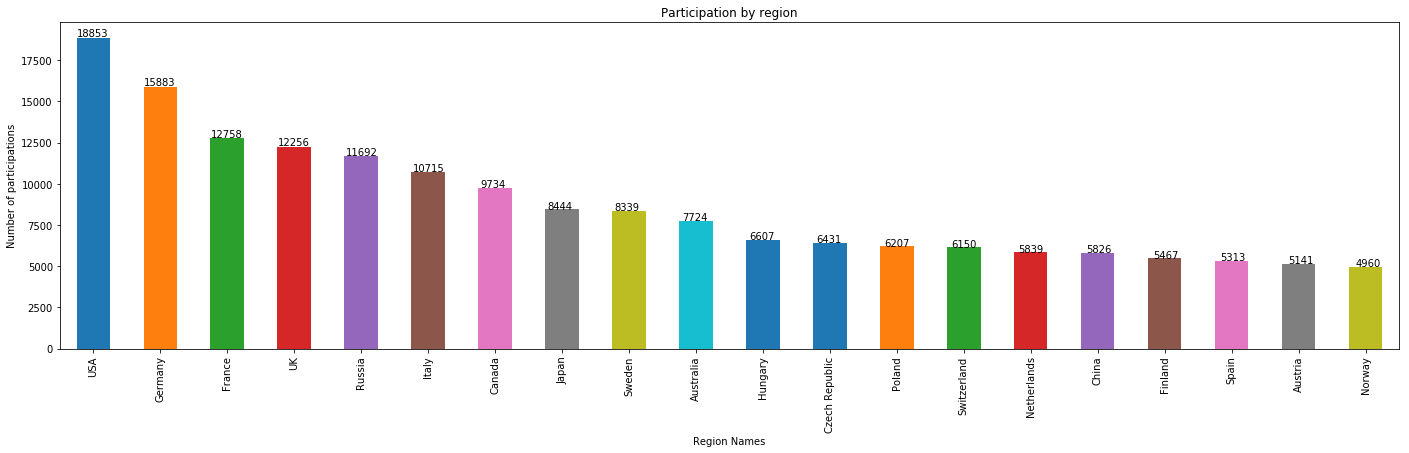

In [49]:
country_counts = athletes.groupby('region')['region'].count()
country_counts_plt = country_counts.nlargest(20).plot(kind='bar', figsize=(24, 6))

country_counts_plt.set_title('Participation by region')
country_counts_plt.set_ylabel('Number of participations')
country_counts_plt.set_xlabel('Region Names')

for p in country_counts_plt.patches:
    country_counts_plt.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
print()

#### Participation by Host city:

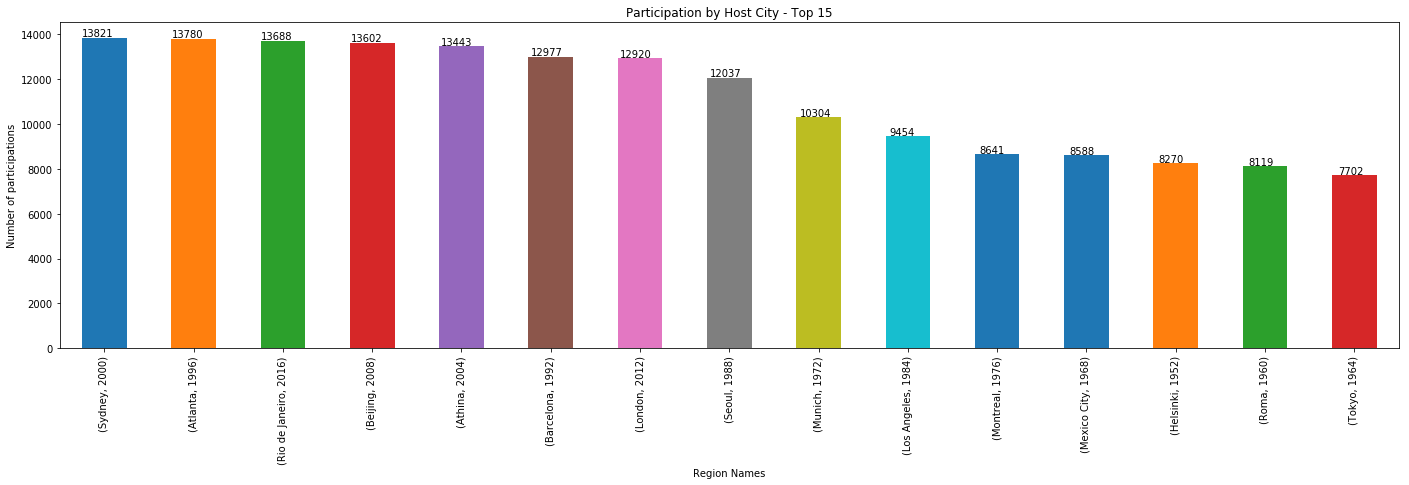

In [50]:
country_counts = athletes.groupby(['City', 'Year'])['City'].count()
country_counts_plt = country_counts.nlargest(15).plot(kind='bar', figsize=(24, 6))

country_counts_plt.set_title('Participation by Host City - Top 15')
country_counts_plt.set_ylabel('Number of participations')
country_counts_plt.set_xlabel('Region Names')

for p in country_counts_plt.patches:
    country_counts_plt.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
print()

Do we have obvious specialization by country? In the sports with highest participation, at least...

This is another tricky computation. It is near impossible to perform using a group-by. The following solution uses a pivot table with a `1` row value. This table is then used to compute the total and then to find max by sport.

In [117]:
region_sport = athletes[['region', 'Sport']].assign(val=1)

In [126]:
top_countries_per_sport = region_sport.pivot_table(index='region', columns='Sport', values='val', aggfunc=np.sum).fillna(0).apply(lambda l: l.idxmax()).reset_index()
top_countries_per_sport

,Sport,0
0,Aeronautics,Switzerland
1,Alpine Skiing,Austria
2,Alpinism,UK
3,Archery,USA
4,Art Competitions,USA
...,...,...
61,Tug-Of-War,UK
62,Volleyball,Russia
63,Water Polo,USA
64,Weightlifting,Germany


### Sports

In [221]:
athletes.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China


How many unique sports does this dataset account for?

In [130]:
athletes.Sport.nunique()

66

How has the number of sports per competition evolved over time?

This is to see how many sports featured in each competition over the years

In [132]:
year_sports_groups = athletes.groupby('Year', as_index=True)['Sport']

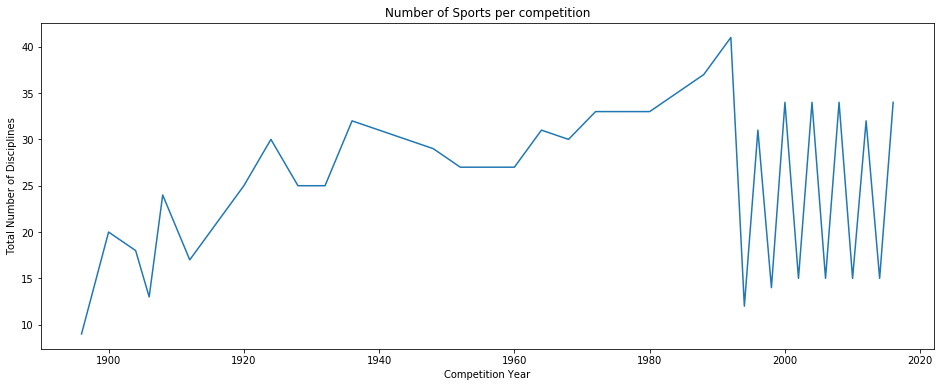

In [140]:
ysgpl = year_sports_groups.agg(lambda l: l.nunique()).plot(figsize=(16, 6))
ysgpl.set_title('Number of Sports per competition')
ysgpl.set_xlabel('Competition Year')
ysgpl.set_ylabel('Total Number of Disciplines')
print()

What are the most popular sports?

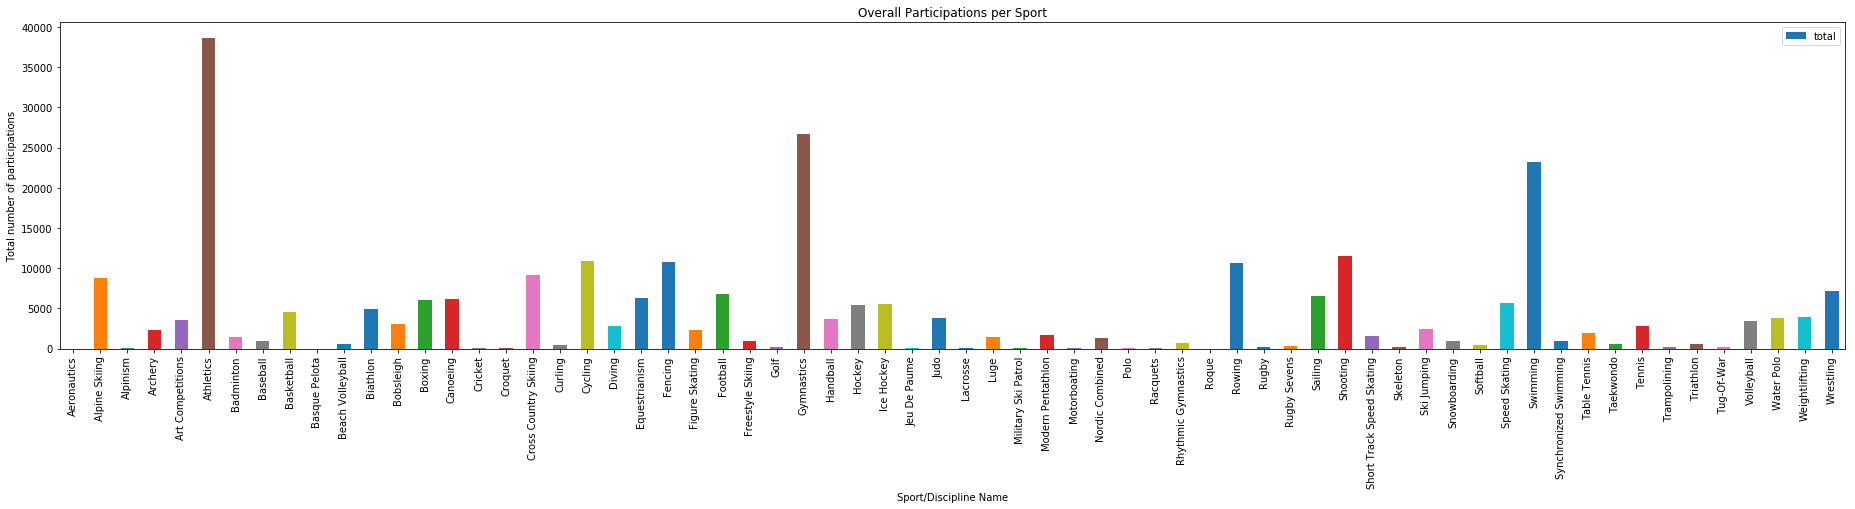

In [160]:
sportplt = athletes.groupby('Sport', as_index=True).count()['ID'].reset_index().assign(total=lambda l: l.ID).plot(kind='bar', figsize=(32, 6), x='Sport', y='total')
sportplt.set_xlabel('Sport/Discipline Name')
sportplt.set_ylabel('Total number of participations')
sportplt.set_title('Overall Participations per Sport')
print()

### Medals

How many medals have been awarded by type overall?

In [175]:
medalsgp = athletes['Medal'].reset_index().groupby('Medal')
medalsgp.count().reset_index()

,Medal,index
0,Bronze,13295
1,Gold,13372
2,Silver,13116


How many medals have been awarded by sport?

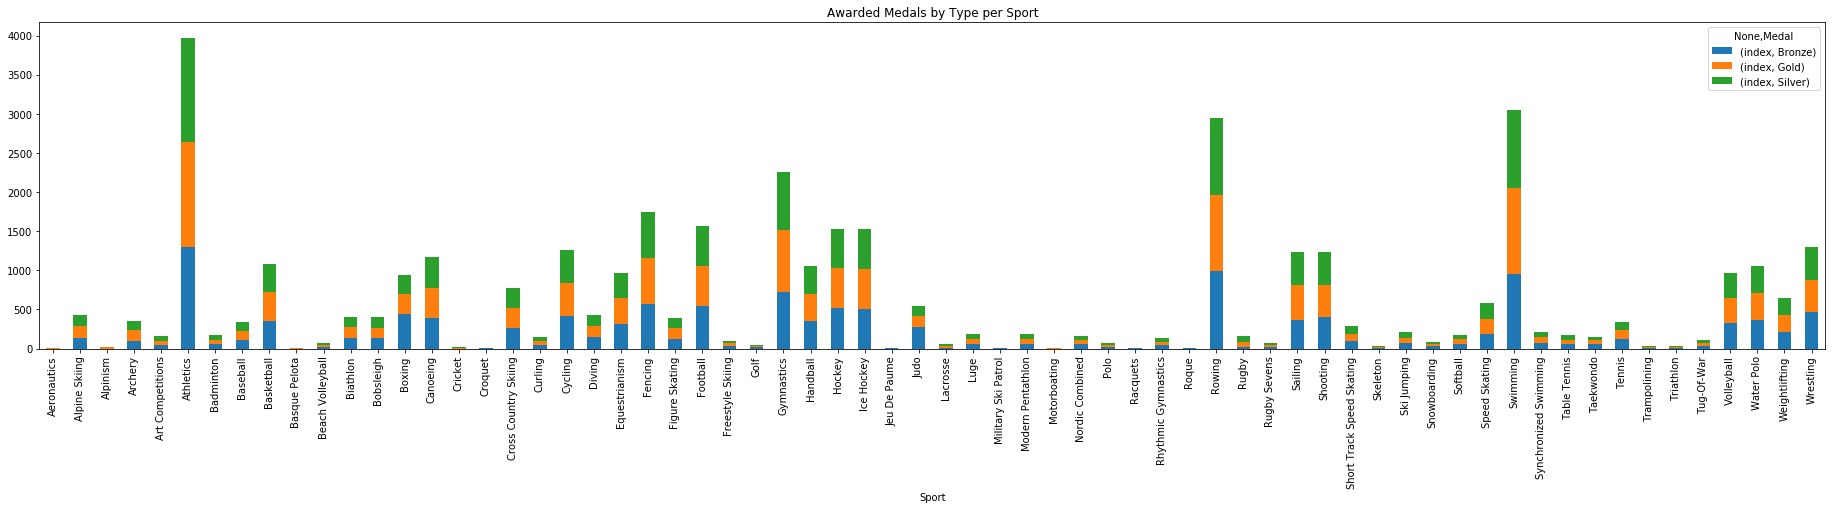

In [187]:
athletes[['Sport', 'Medal']].reset_index().groupby(['Sport', 'Medal']).count().unstack().fillna(0).plot(kind='bar', stacked=True, figsize=(32, 6), title='Awarded Medals by Type per Sport')
print()

Which Year has awarded the most medals?

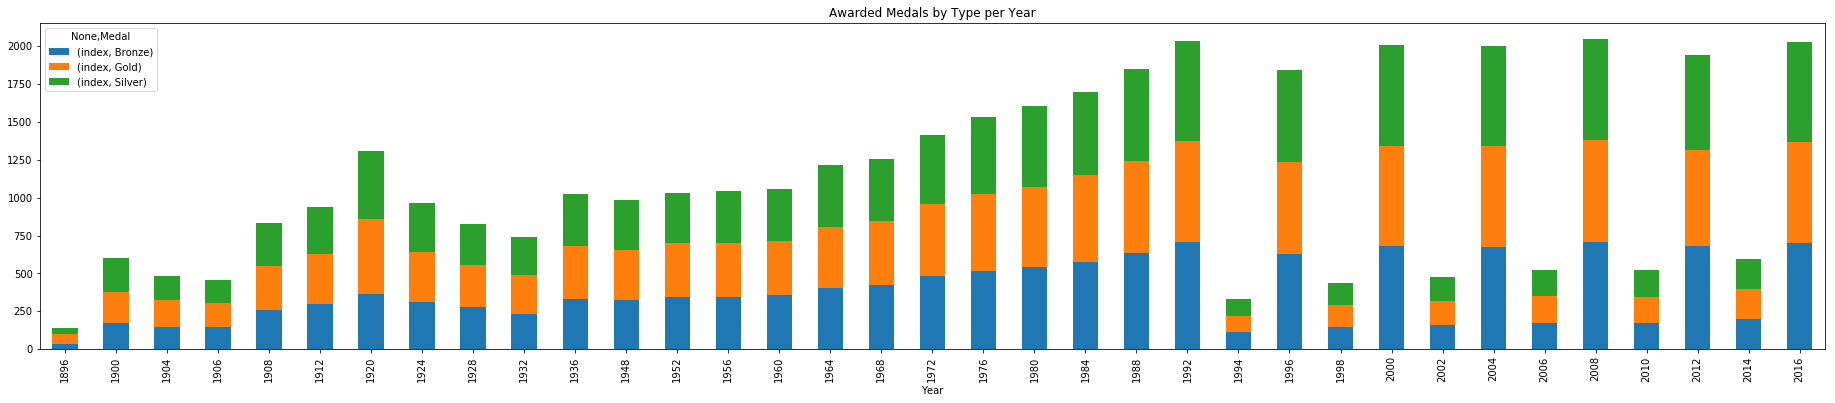

In [201]:
athletes[['Year', 'Medal']].reset_index().groupby(['Year', 'Medal']).count().unstack().fillna(0).plot(kind='bar', stacked=True, figsize=(32, 6), title='Awarded Medals by Type per Year')
print()

In [194]:
athletes[['Year', 'Medal']].reset_index().groupby(['Year', 'Medal']).count()#.unstack()

index
Year Medal        
1896 Bronze     38
     Gold       62
     Silver     43
1900 Bronze    175
     Gold      201
...            ...
2014 Gold      202
     Silver    197
2016 Bronze    703
     Gold      665
     Silver    655

[105 rows x 1 columns]

What countries have won the most medals?

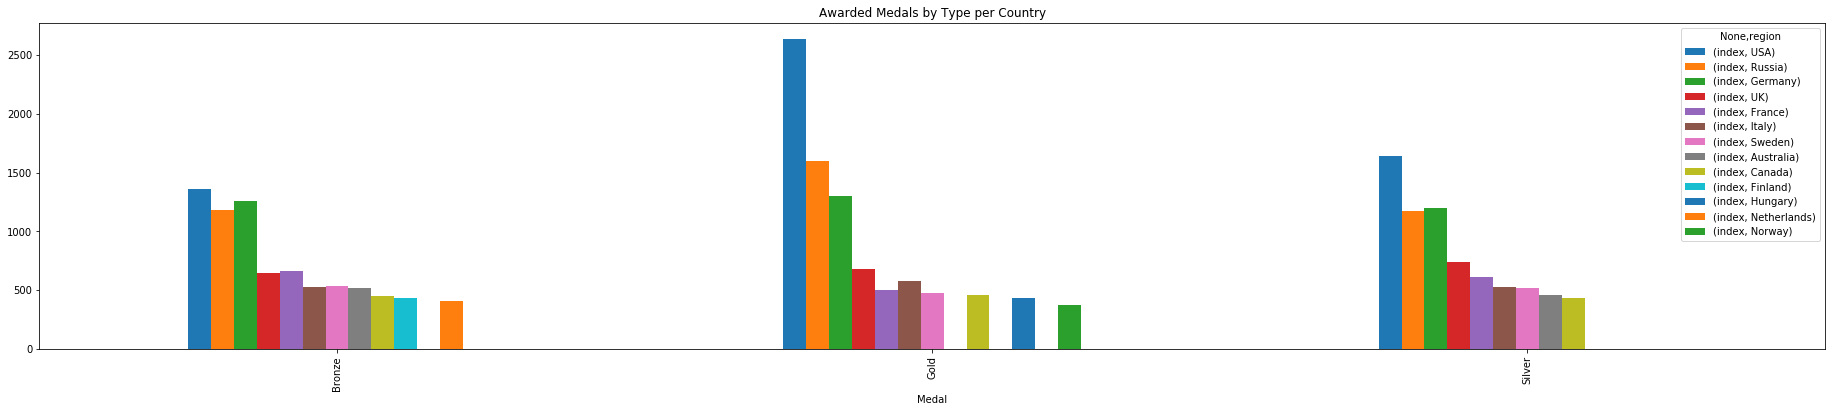

In [211]:
athletes[['Medal', 'region']].reset_index().groupby(['Medal', 'region']).count().sort_values(by='index', ascending=False).head(30).unstack().fillna(0).plot(kind='bar', stacked=False, figsize=(32, 6), title='Awarded Medals by Type per Country')
print()

Which athletes have won the most medals?

In [213]:
athletes[['Medal', 'ID', 'Name']].reset_index().groupby(['Medal', 'ID', 'Name']).count().sort_values(by='index', ascending=False).reset_index()

,Medal,ID,Name,index
0,Gold,94406,"Michael Fred Phelps, II",23
1,Gold,33557,"Raymond Clarence ""Ray"" Ewry",10
2,Gold,113912,Mark Andrew Spitz,9
3,Gold,87390,Paavo Johannes Nurmi,9
4,Gold,69210,"Frederick Carlton ""Carl"" Lewis",9
...,...,...,...,...
33740,Bronze,132960,Miruts Yifter,1
33741,Bronze,132957,Yi Siling,1
33742,Bronze,132948,Lyudmila Andreyevna Yezhova-Grebenkova,1
33743,Bronze,132939,Nadezhda Aleksandrovna Yevstyukhina,1
